# Pythonによる相関の確認

サンプルデータを用いて相関について確認します．
確認方法は，次のステップになります．

1. 6個の変量からなるデータフレームを作成します．
- 基準となる1つの変量と他の変量とのグラフによる比較を行います．
    - 2変量の散布図を作成します．
    - 散布図上に回帰直線を引きます．
    - 相関係数を計算します．

これらの結果のグラフから相関の強い/弱い，正/負の違いを確認します．

## ライブラリーの搬入

必要なライブラリーを搬入します．

```Python
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

## データフレームの作成

辞書配列とリスト配列を使って，6個の変量を持つデータフレームを作成します．

```Python
data = {
    'data0':[10,20,30,40,50,60,70,80,90,100],
    'data1':[16,25,24,38,52,66,78,84,86, 98],
    'data2':[34,28,54,48,12,76,42,77,84, 62],
    'data3':[50,88,36,44,84,46,68,34,86, 49],
    'data4':[70,36,58,43,64,65,48,16,34, 20],
    'data5':[88,74,68,58,64,38,33,22,14,  8]
}
df = pd.DataFrame(data)
df.head(3)
```

In [2]:
data = {
    'data0':[10,20,30,40,50,60,70,80,90,100],
    'data1':[16,25,24,38,52,66,78,84,86, 98],
    'data2':[34,28,54,48,12,76,42,77,84, 62],
    'data3':[50,88,36,44,84,46,68,34,86, 49],
    'data4':[70,36,58,43,64,65,48,16,34, 20],
    'data5':[88,74,68,58,64,38,33,22,14,  8]
}
df = pd.DataFrame(data)
df.head(3)

,data0,data1,data2,data3,data4,data5
0,10,16,34,50,70,88
1,20,25,28,88,36,74
2,30,24,54,36,58,68


### 分散共分散の算出

分散共分散行列は<font color='green'>cov()</font>メソッドによって求めることができます．

```Python
df.cov()
```

In [3]:
df.cov()

,data0,data1,data2,data3,data4,data5
data0,916.666667,888.333333,447.222222,0.555556,-365.555556,-817.222222
data1,888.333333,883.566667,414.900000,14.277778,-345.088889,-793.211111
data2,447.222222,414.900000,549.344444,-198.277778,-203.977778,-468.433333
data3,0.555556,14.277778,-198.277778,444.722222,18.555556,33.833333
data4,-365.555556,-345.088889,-203.977778,18.555556,359.377778,355.355556
data5,-817.222222,-793.211111,-468.433333,33.833333,355.355556,752.455556


### 相関係数の算出

全ての数値変量間の相関係数は <font color='green'>corr()</font>メソッドによって求めることができます．

```Python
df.corr()
```

In [4]:
df.corr()

,data0,data1,data2,data3,data4,data5
data0,1.000000,0.987076,0.630225,0.000870,-0.636901,-0.983998
data1,0.987076,1.000000,0.595527,0.022777,-0.612401,-0.972812
data2,0.630225,0.595527,1.000000,-0.401150,-0.459076,-0.728593
data3,0.000870,0.022777,-0.401150,1.000000,0.046415,0.058487
data4,-0.636901,-0.612401,-0.459076,0.046415,1.000000,0.683356
data5,-0.983998,-0.972812,-0.728593,0.058487,0.683356,1.000000


また，個別に相関係数を求めるには次のようにします．
この例は data0 と data1 との相関係数です．
df.corr()メソッドの結果と一致しています．

```Python
df.data0.corr(df.data1)
```

In [5]:
df.data0.corr(df.data1)

0.9870759656977014

この後，各データ間の相関を理解するために散布図を作成しますが，相関の度合いを分かりやすくするために近似直線を引きます．
近似直線には幾つかの方法がありますが，ここでは単純な回帰直線を利用します．

### 線型回帰モデル

線形回帰モデルは，sklean.linear_model にある関数によってオブジェクトを生成します．
そして，このオブジェクトに対して回帰モデルの生成および予測の実施のために個別の関数を使用します．

- <font face='courier new' color='green'>LinearRegression()</font>：オブジェクトの生成
- <font face='courier new' color='green'>fit()</font>：回帰モデルの作成
- <font face='courier new' color='green'>predict()</font>：予測の実施

まず準備として，LinearRegression()関数によって線形回帰モデル用のオブジェクトを作成します．
ここでは，そのオブジェクトを reg という変数に代入します．

fit()関数には説明変数と目的変数を与える必要がありますが，このモジュールは重回帰分析に対応しているため説明変数は1つの場合でも2重配列にする必要があります．
説明変数として data0 を採用しますが，このデータを2重配列に変更したものを変数 x に代入しておきます．

```Python
reg = linear_model.LinearRegression()
x = df.data0.values.reshape([-1,1])
x
```

In [6]:
reg = linear_model.LinearRegression()
x = df.data0.values.reshape([-1,1])
x

array([[ 10],
       [ 20],
       [ 30],
       [ 40],
       [ 50],
       [ 60],
       [ 70],
       [ 80],
       [ 90],
       [100]], dtype=int64)

ここで，目的変数として data1 を採用した場合の線形回帰モデルは次の命令で構成されます．

```Python
reg.fit(x,df.data1.values)
```

In [7]:
reg.fit(x,df.data1.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

この線形回帰モデルの予測値は，次の命令で求まります．

```Python
reg.predict(x)
```

In [8]:
reg.predict(x)

array([ 13.09090909,  22.78181818,  32.47272727,  42.16363636,
        51.85454545,  61.54545455,  71.23636364,  80.92727273,
        90.61818182, 100.30909091])

## 散布図での相関の確認

変量data0と他の変量との相関について，散布図と回帰直線を描画して，確認していきます．
比較する変量によって次のような傾向が分かります．

- data1：強い正の相関
- data2：弱い正の相関
- data3：無相関
- data4：弱い負の相関
- data5：強い負の相関

### 散布図（data0, data1）

以上のプログラムを使用して data0 と data1 との相関を散布図上で確認します．
散布図上に回帰直線を引いています．
さらにタイトルに相関係数を記載しました．
夫々の関数の役割は次のようになっています．

- <font face='courier new' color='green'>reg.fit()</font>：回帰モデルの構築
- <font face='courier new' color='green'>plt.plot()</font>：回帰直線の描画
- <font face='courier new' color='green'>plt.scatter()</font>：散布図の描画
- <font face='courier new' color='green'>plt.title()</font>：タイトルの追加
- <font face='courier new' color='green'>plt.xlabel()</font>：x軸のラベルの追加
- <font face='courier new' color='green'>plt.ylabel()</font>：y軸のラベルの追加
- <font face='courier new' color='green'>plt.axis()</font>：グラフの縦横比の設定
- <font face='courier new' color='green'>plt.show()</font>：以上の図の表示

```Python
reg.fit(x,df.data1.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data1)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data1)),3)))
plt.xlabel('data 0')
plt.ylabel('data 1')
plt.axis('scaled')
plt.show()
```

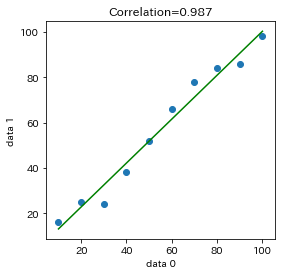

In [9]:
reg.fit(x,df.data1.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data1)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data1)),3)))
plt.xlabel('data 0')
plt.ylabel('data 1')
plt.axis('scaled')
plt.show()

相関係数が 0.987 と，強い正の相関を示しています．
プロットした点が回帰直線に沿っていることが分かります．

### 散布図（data0, data2）

```Python
reg.fit(x,df.data2.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data2)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data2)),3)))
plt.xlabel('data 0')
plt.ylabel('data 2')
plt.axis('scaled')
plt.show()
```

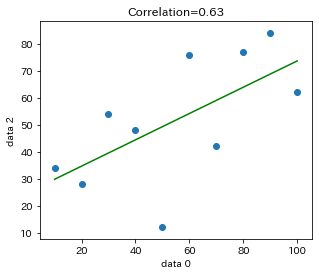

In [10]:
reg.fit(x,df.data2.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data2)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data2)),3)))
plt.xlabel('data 0')
plt.ylabel('data 2')
plt.axis('scaled')
plt.show()

相関係数が 0.63 と正の相関になっていますが，それほど強い相関ではありません．
散布図の点も回帰直線から離れて分布しています．

### 散布図（data0, data3）

```Python
reg.fit(x,df.data3.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data3)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data3)),3)))
plt.xlabel('data 0')
plt.ylabel('data 3')
plt.axis('scaled')
plt.show()
```

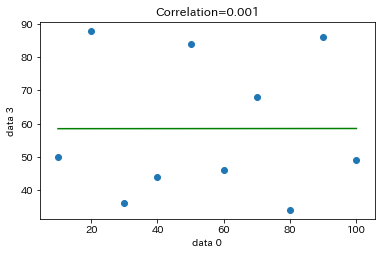

In [11]:
reg.fit(x,df.data3.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data3)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data3)),3)))
plt.xlabel('data 0')
plt.ylabel('data 3')
plt.axis('scaled')
plt.show()

相関係数が 0.001 なので，ほぼ無相関です．
この場合の回帰直線に利用価値はありません．

### 散布図（data0, data4）

```Python
reg.fit(x,df.data4.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data4)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data4)),3)))
plt.xlabel('data 0')
plt.ylabel('data 4')
plt.axis('scaled')
plt.show()
```

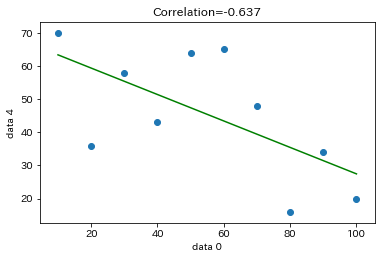

In [12]:
reg.fit(x,df.data4.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data4)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data4)),3)))
plt.xlabel('data 0')
plt.ylabel('data 4')
plt.axis('scaled')
plt.show()

相関係数が -0.637 と，負の相関になっています．
相関の強さは中間的です．
負の相関なので，回帰直線は右下がりになっています．

### 散布図（data0, data5）

```Python
reg.fit(x,df.data5.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data5)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data5)),3)))
plt.xlabel('data 0')
plt.ylabel('data 5')
plt.axis('scaled')
plt.show()
```

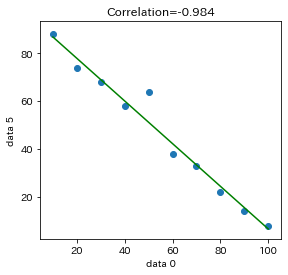

In [13]:
reg.fit(x,df.data5.values)
plt.plot(x,reg.predict(x),color='green')
plt.scatter(df.data0,df.data5)
plt.title('Correlation='+str(round(float(df.data0.corr(df.data5)),3)))
plt.xlabel('data 0')
plt.ylabel('data 5')
plt.axis('scaled')
plt.show()

相関係数が -0.984 と強い負の相関になっています．
右下がりの回帰直線に散布図の点が沿っています．

*****